In [29]:
from picamera.array import PiYUVArray, PiRGBArray
from picamera import PiCamera

from scipy.signal import find_peaks, butter, filtfilt

import time
import matplotlib.pyplot as plt
import skimage as ski

# Camera resolution
res = (640, 480)

In [30]:
# Interface the camera capturing RGB images

camera = PiCamera()
        
# Check the link below for the combinations between mode and resolution
# https://picamera.readthedocs.io/en/release-1.13/fov.html#sensor-modes
camera.sensor_mode = 7
camera.resolution = res
camera.framerate = 120

# Initialize the buffer and start capturing
rawCapture = PiRGBArray(camera, size=res)
stream = camera.capture_continuous(rawCapture, format="rgb", use_video_port=True)

In [31]:
# Get next frame from the stream

rawCapture.truncate(0)
frame = next(stream)

In [32]:
%%timeit

# Bigger the image, more it takes for the conversion
I = ski.color.rgb2gray(frame.array)

79 ms ± 12.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [33]:
%%timeit

# Arlgorithms operate faster on smaller images
I = ski.color.rgb2gray(frame.array[0:320, 0:240, :])

42.5 ms ± 4.49 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


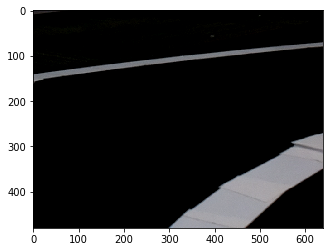

In [34]:
# Show the captured image
plt.imshow(frame.array)

In [35]:
# Release resources
stream.close()
rawCapture.close()
camera.close()